# Курсовая работа
#### по дисциплине «Структуры и алгоритмы компьютерной обработки данных»
#### на тему «Алгоритмы машинного обучения»

### Выполнила:
студентка 2 курса
группы 15.11Д-МО11/20б
очной формы обучения
**Исаева Диана Фармановна**
### Научный руководитель:
к.э.н, доцент
Базовой кафедры Цифровой экономики
Института развития информационного общества
**Комлева Нина Викторовна**

# Импорт модулей и библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Алгоритм логистической регрессии

Построим график, отображающий работу логистической регрессии

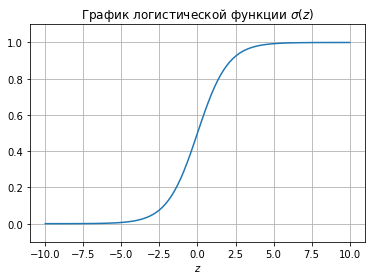

In [2]:
z = np.linspace(-10, 10, 100)
sigma = 1/(1+np.exp(-z))
plt.plot(z, sigma)
plt.ylim(-0.1, 1.1)
plt.xlabel('$z$')
plt.title('График логистической функции $\sigma(z)$')
plt.grid()
plt.show()

In [62]:
class LogitRegression():
    
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function for model training    
    def fit(self, data, label):
        
        """Функция обучения модели
        
        На вход:
        X - признаки данных
        Y - разметка данных
        """
        
        # no_of_training_examples, no_of_features        
        self.line, self.col = data.shape
        
        # weight initialization        
        self.W = np.zeros(self.col)
        self.b = 0
        self.data = data
        self.label = label

        # gradient descent learning
        for i in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        
        """Вспомогательная функция для обновления весов при градиентном спуске"""
        
        A = 1 / (1 + np.exp(- (self.data.dot(self.W) + self.b)))

        # calculate gradients        
        lbl = (A - self.label.T)
        lbl = np.reshape(lbl, self.line)
        new_W = np.dot(self.data.T, lbl) / self.line
        new_b = np.sum(lbl) / self.line

        # update weights    
        self.W = self.W - self.learning_rate * new_W
        self.b = self.b - self.learning_rate * new_b

        return self

    def predict(self, data):
        
        """Гипотетическая функция h(x)"""
        
        Z = 1 / (1 + np.exp(- (data.dot(self.W) + self.b)))
        label = np.where(Z > 0.5, 1, 0)
        return label

# Считываем данные 

Этот набор данных получен из Национального института диабета, болезней органов пищеварения и почек. Цель набора данных состоит в том, чтобы диагностически предсказать, есть ли у пациента диабет или нет, на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь - женщины в возрасте не менее 21 года индийского происхождения Пима.

Наборы данных состоят из нескольких медицинских переменных-предикторов и одной целевой переменной - результата. Предикторные переменные включают количество беременностей, которые были у пациентки, ее ИМТ, уровень инсулина, возраст и так далее.

In [4]:
df = pd.read_csv("diabetes.csv")

Посмотрим, нет ли пропущенных значений в данных

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Посмотрим на гистограммы распределений

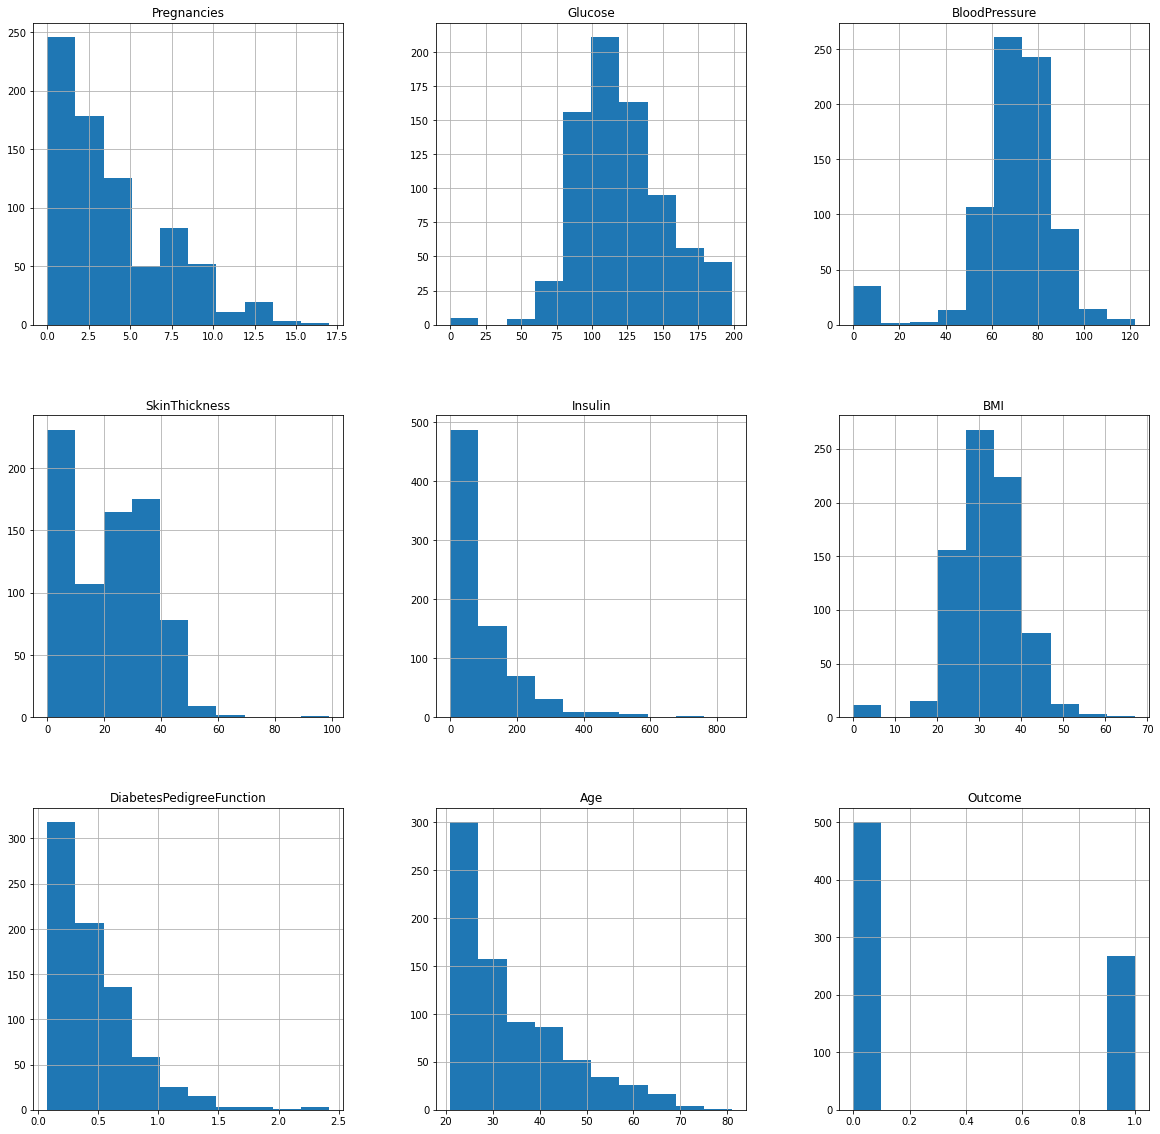

In [6]:
df.hist(figsize=(20, 20))
plt.show()

Посмотрим на типы данных в массиве

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Разделим данные следующим образом: в **Х** все признаки, а в **у** разметка

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

# Предобработка данных

Так как в данных у нас диапозон значений различный, данные нужно отшкалировать (то есть привести к одному диапозону)

In [9]:
scaler = MinMaxScaler(feature_range=(0, 5))

In [10]:
col_df = list(X.columns)
for col in col_df:
    X[col] = X[col].astype(float)
    X[[col]] = scaler.fit_transform(X[[col]])

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.764706,3.718593,2.950820,1.767677,0.000000,2.503726,1.172075,2.416667
1,0.294118,2.135678,2.704918,1.464646,0.000000,1.982116,0.582835,0.833333
2,2.352941,4.597990,2.622951,0.000000,0.000000,1.736215,1.268147,0.916667
3,0.294118,2.236181,2.704918,1.161616,0.555556,2.093890,0.190009,0.000000
4,0.000000,3.442211,1.639344,1.767677,0.992908,3.211624,4.718190,1.000000


Разделим данные на обучающую и тестовую выборки

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(
        X.values, y.values, test_size=0.3, random_state=0)

In [13]:
print(X_train.shape)
print(X_test.shape)

(537, 8)
(231, 8)


# Обучение моделей

#### Обучение реализованного мною алгоритма

In [48]:
model = LogitRegression(learning_rate=0.2, iterations=800)
model.fit(X_train, Y_train)

#### Обучение алгоритма из библиотеки scikit-learn

In [49]:
model_sklearn = LogisticRegression()
model_sklearn.fit(X_train, Y_train)

C:\Users\isaev\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#### Делаем предсказания

In [50]:
# Prediction on test set
Y_pred = model.predict(X_test)
Y_pred_sklearn = model_sklearn.predict(X_test)

# Сравним работу двух алгоритмов с помощью метрик

1) Confusion_matrix

Text(0.5, 257.44, 'Predicted label')

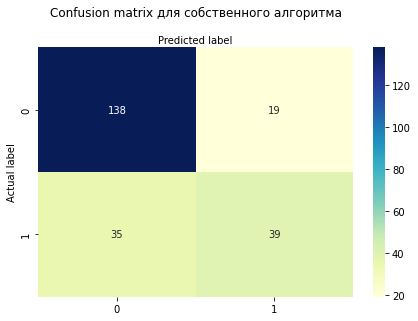

In [51]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix для собственного алгоритма', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

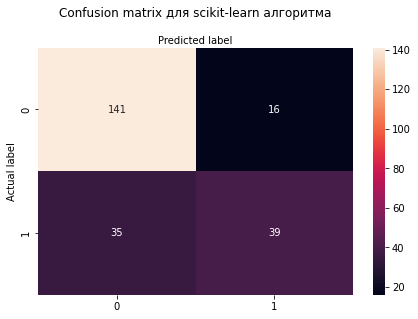

In [52]:
cnf_matrix = confusion_matrix(Y_test, Y_pred_sklearn)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix для scikit-learn алгоритма', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2) Accuracy

In [53]:
print("Accuracy для собственного алгоритма: ", accuracy_score(Y_test, Y_pred))
print("Accuracy для scikit-learn алгоритма: ", accuracy_score(Y_test, Y_pred_sklearn))

Accuracy для собственного алгоритма:  0.7662337662337663
Accuracy для scikit-learn алгоритма:  0.7792207792207793


3) Precision

In [54]:
print("Precision для собственного алгоритма: ", precision_score(Y_test, Y_pred))
print("Precision для scikit-learn алгоритма: ", precision_score(Y_test, Y_pred_sklearn))

Precision для собственного алгоритма:  0.6724137931034483
Precision для scikit-learn алгоритма:  0.7090909090909091


4) Recall

In [55]:
print("Recall для собственного алгоритма: ", recall_score(Y_test, Y_pred))
print("Recall для scikit-learn алгоритма: ", recall_score(Y_test, Y_pred_sklearn))

Recall для собственного алгоритма:  0.527027027027027
Recall для scikit-learn алгоритма:  0.527027027027027


5) F1 мера

In [56]:
print("F1 для собственного алгоритма: ", f1_score(Y_test, Y_pred))
print("F1 для scikit-learn алгоритма: ", f1_score(Y_test, Y_pred_sklearn))

F1 для собственного алгоритма:  0.5909090909090909
F1 для scikit-learn алгоритма:  0.6046511627906976


Соберем все метрики в одно место

In [57]:
metrics = {'F1_Score':f1_score, 'Accuracy': accuracy_score, 'Precision': precision_score, 'Recall': recall_score}

model_names = ['Mine Logistic Regression', 'Scikit-learn Logistic Regression']

compare = pd.DataFrame()

In [58]:
def calculate_metrics(y_test, y_pred, metrics={}):
    
    """Функция вычисления метрик
    
    На вход:
    y_test - тестовый набор данных
    y_pred - предиктовые значения
    
    
    На выходе: вычисленные метрики"""
    
    if len(metrics) == 0:
        raise ValueError('metrics are empty')
        
    results = dict()
    for key in metrics:
        results[key] = metrics[key](y_test, y_pred)
    
    return results

In [59]:
results_my_logregr = calculate_metrics(Y_test, Y_pred, metrics=metrics)  
compare = compare.append(results_my_logregr, ignore_index=True)

C:\Users\isaev\AppData\Local\Temp\ipykernel_14964\526581012.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare = compare.append(results_my_logregr, ignore_index=True)


In [60]:
results_sklearn_logregr = calculate_metrics(Y_test, Y_pred_sklearn, metrics=metrics)  
compare = compare.append(results_sklearn_logregr, ignore_index=True)

C:\Users\isaev\AppData\Local\Temp\ipykernel_14964\2611607937.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare = compare.append(results_sklearn_logregr, ignore_index=True)


In [61]:
compare.index = model_names
compare

,F1_Score,Accuracy,Precision,Recall
Mine Logistic Regression,0.590909,0.766234,0.672414,0.527027
Scikit-learn Logistic Regression,0.604651,0.779221,0.709091,0.527027


# Вывод
Реализованный мною алгоритм практически не отличается от уже реализованного алгоритма из библиотеки для анализа данных scikit-learn.